In [106]:
%matplotlib inline
import matplotlib.pyplot as plt, numpy as np, pandas as pd

# Simple Scatter Plots

This style of plotting involves placing dots, circles or other shapes on the figure instead of connecting the lines of the points on the graph.

## Scatter Plots with `plt.plot`

Simple scatter plots can be produces from the previously implemented functions `plt.plot`/`ax.plot`

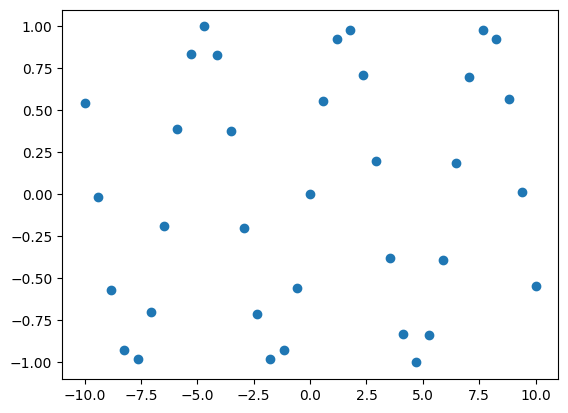

In [107]:
x=np.linspace(-10,10,35)
y=np.sin(1*x)

plt.plot(x,y,'o')

Remember in the previous tutorial, the third argument was used to specify the texture of the line being displayed. This argument can also be used to specify the shape of the point s that are being plotted. There are multiple shapes that can be used, all of which can be seen in the documentation, here are all of them in action.

In [108]:
from pathlib import Path
markers=pd.Series(Path('Markers.txt').read_text().split('\n')).str[1]
markers

0     .
1     ,
2     o
3     v
4     ^
5     <
6     >
7     1
8     2
9     3
10    4
11    8
12    s
13    p
14    P
15    *
16    h
17    H
18    +
19    x
20    X
21    D
22    d
23    |
24    _
dtype: object

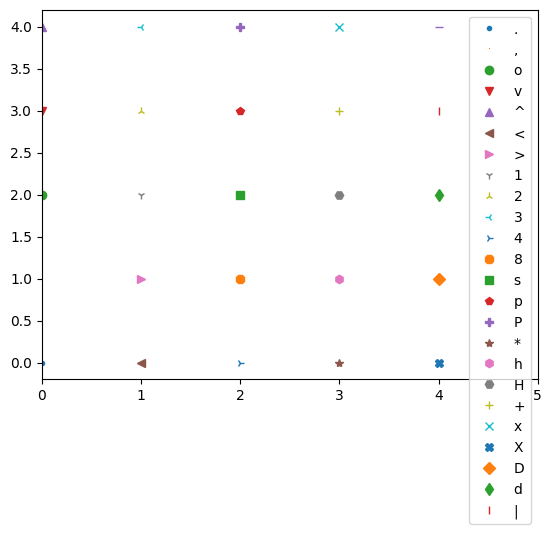

In [109]:
for index in markers.index:
    plt.plot(index//5,index%5,markers[index],label=str(markers[index]))
plt.xlim(0,5)
plt.legend()

Infact these shapes can be used in combination with the line plot as follows

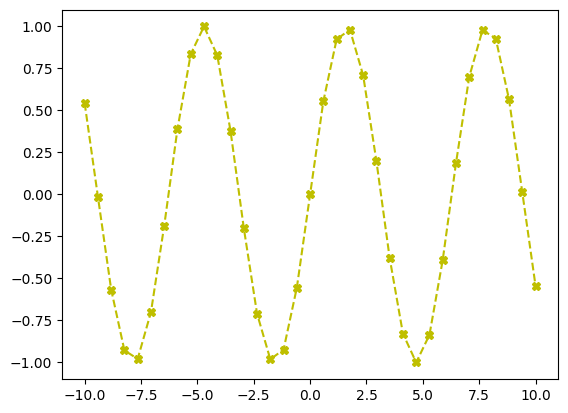

In [110]:
plt.plot(x,y,'--Xy')

There are multiple arguments within plt.plot function that can help you customize the marker's dimension.

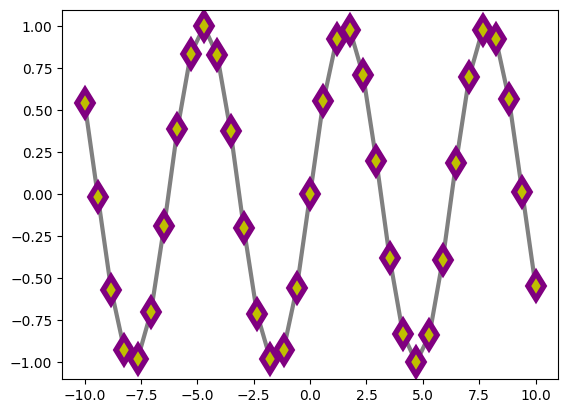

In [111]:
plt.plot(x,y,'-d',color='grey',
         linewidth=3,
         markersize=13,
         markerfacecolor='y',
         markeredgecolor='purple',
         markeredgewidth=4)

This flexibility provides a vide variety of visualization in `plt.plot()`

## Scatter Plots using `plt.scatter`

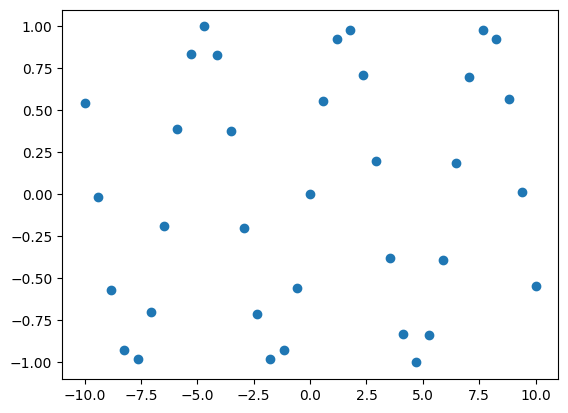

In [112]:
plt.scatter(x,y,marker='o')

The `plt.scatter` function is somewhat similar to `plt.plot` function. The only difference being in the freedom it gives in individually customizing each point(size, color, edge dimensions,etc.)

c:\Users\denis\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


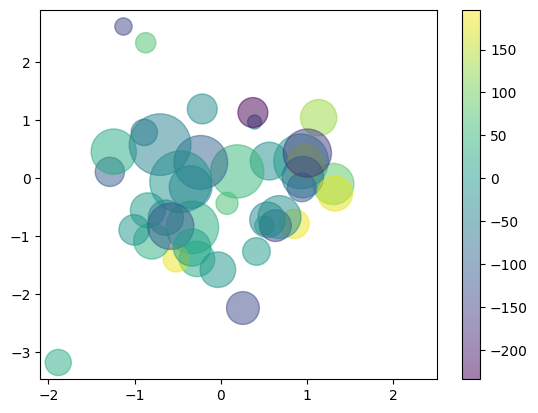

In [113]:
RandomState=np.random.RandomState()
x=RandomState.randn(100)
y=RandomState.randn(100)
colors=RandomState.normal(0,100,100)
sizes=1000*RandomState.randn(100)
plt.scatter(
    x,
    y,
    c=colors,
    s=sizes,
    alpha=.5,
    cmap='viridis',
)
plt.colorbar()

This is a very efficient way of conveying multi-dimensional data using colors and sizes of the point.

For instance, let's try to plot the points on the iris dataset, that contains dimensions of types of flowers carefully measured:

In [114]:
from sklearn.datasets import load_iris
iris=load_iris(as_frame=True)
print(iris.keys())
IrisData=pd.concat([iris['data'],iris['target']],axis=1).merge(pd.Series(iris['target_names'],name='Target Name'),left_on='target',right_index=True,)
IrisData.describe()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Text(0, 0.5, 'sepal width (cm)')

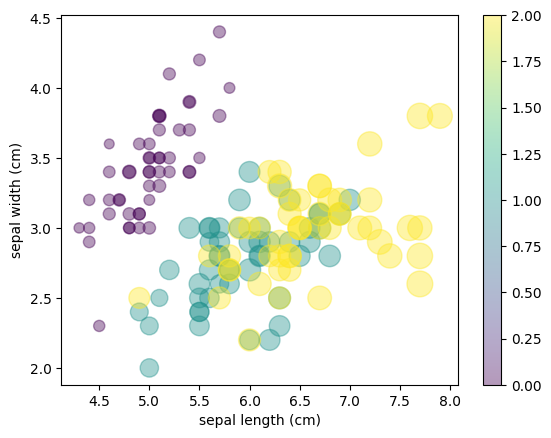

In [105]:
plt.scatter(
    x=IrisData['sepal length (cm)'],
    y=IrisData['sepal width (cm)'],
    c=IrisData['target'],
    s=50*IrisData['petal length (cm)'],
    alpha=.4,
    cmap='viridis'
)
plt.colorbar()
plt.xlabel(iris['feature_names'][0])
plt.ylabel(iris['feature_names'][1])

## `plt.scatter()` or `plt.plot()`

On attempting to compare the efficiency of both of these functions it might not seem obvious how efficient `plt.plot()` is compared to `plt.scatter()` but as datasets get more and more rich and the plotting gets more cumbersome, it's evident how the former outperforms the later. The main reason being the feature of `plt.scatter()` that allows us the freedom to specify each point's size and dimensions explicitly. This is a clear hint to how each point is explicitly plotted. In comparison to this, `plt.plot()` fixes the visuals of each point beforehand, after which all it needs to concentrate on is the plotting of the points.